# CS345 Assignment 3

## Fall 2021
### November 1, 2021

In this assignment, you will be exploring regression to predict wine quality ratings.  The data for this assignment originates in the UCI Dataset Repository - [here is the direct link](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality). Please, as we get started, note this is **not** the same dataset as the sklearn [Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html).  

As you work through what follows you will be writing code that enables you to examine how the task of predicting wine quality can be treated as a regression problem as well as a classification problem.  The assignment has 10 parts and includes a mix of code provided to you and node you need to create yourself.

In [479]:
## These includes are provided for you.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline

## Part 1: Loading Red Wine Data

Here we are asking you to load the red wine quality data from a csv file and construct a Panda DataFrame. There are annoying details in successfully reading the file ``winequality-red.csv`` provided here:

[Index of /ml/machine-learning-databases/wine-quality](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

Therefore, to speed you along, here is the code to read the downloaded data into a dataframe. Also, about the annoying detail, the file suffix "csv" stands for comma seperated variables. Unfortunately, some folks insist on keep "csv" when changing the seperator from comman to semi-colon.  Note a simple second argument gets us past this obstacle. 




In [480]:
# Run Code

wine_red  = pd.read_table(r'winequality-red.csv', sep=';')
original  = [str for str in wine_red.columns]
reordered = [original[11]] + original[0:11]
wine_red  = wine_red.reindex(columns=reordered)
wine_red.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Part 2: Exhaustive Correlation Between Features

A logical first step in better understanding the data is to compute the correlation between all pairs of features. And in this context, include the variable to be predicted, namely ``quality`` in this comparison.

In [481]:
# Enter Code
wine_red.corr()


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166
fixed acidity,0.124052,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.390558,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.226373,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.013732,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,-0.128907,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.050656,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.185100,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,-0.174919,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.057731,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633


## Part 2: Interpreting Univariate Analysis

This problem straddles the line between being a classification problem and being a regression problem. To better understand this statement let us begin with a basic univariate regression model applied to a single feature, using the feature above shown to have the hightest correlation with ``quality``

In [482]:
# Write Code

def fit_univariate_model (df, feat) :
  lra = LinearRegression()
  lra.fit(df[feat][:,np.newaxis], df['quality'])
  # xs = np.linspace(9,15,1599)
  # print(xs)
  # lra = model.predict(df[feat][:,np.newaxis])
  
  return df[feat][:,np.newaxis], df['quality'], lra


In [483]:
# Run Code

Xa, ya, lra = fit_univariate_model(wine_red,'alcohol')
# print(lra)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


Now you are being asked to write code to create a plot you have already seen. Here are some hints to help you better match what you see.  First, the size of the plot is 12 by 5.  Next, the true y values are in darkred.  The predicted values on in darkgreen.  Finally, you are of course required to create an xlabel, ylabel and plot title. 

Regarding the printing of floating point values, here are two hints.  I choose to use a ``4.2f`` format on the error scores and also I used the explicit tab escape sequence ``\t`` to align printed numbers.

In [484]:
# Write Code

def plot_regression_result_1(X, y, lr, xlabel) :
  predicted = lr.predict(X)
  print("The root mean squared error is: \t{:4.2f}".format(mean_squared_error(y, predicted)))
  print("the mean absolute error is: \t\t{:4.2f}".format(mean_absolute_error(y,predicted)))

  title = 'Regression result: RMSE {:4.2f} MAE {:4.2f}'.format( mean_squared_error(y, predicted), mean_absolute_error(y,predicted))

  plt.figure(figsize=(12,5))
  plt.scatter(X,y, c ='darkred')
  plt.scatter(X,predicted, c = 'darkgreen')
  plt.ylabel('Quality')
  plt.xlabel(xlabel)
  plt.title(title)


Notice in the next code block that the default font size for plotting is changed to 12 point.

The root mean squared error is: 	0.50
the mean absolute error is: 		0.56


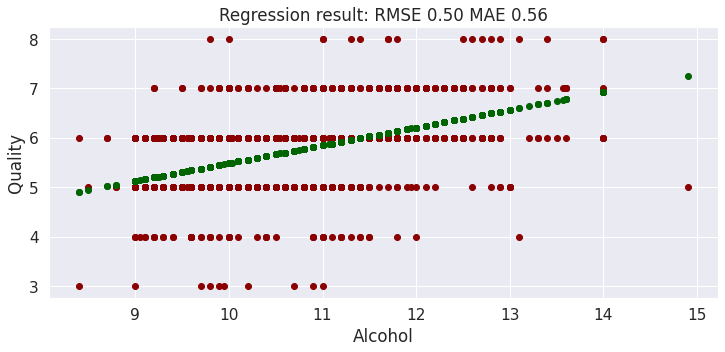

In [485]:
# Run Code

plt.rcParams.update({'font.size': 12})

plot_regression_result_1(Xa, ya, lra, 'Alcohol')

As you can see from the above regression plot, while quality ranges from 3 to 8, the values are integers and as such this problem feels a lot like a classification task and less like a regression task.  

Going a bit further, that by following the output above you have computed both the root mean squared error and also the mean absolute error.  It is slightly easier to put the interpretation of the mean absolute error into a sentence. In essence, this regression model using only alcohol content can predict the quality rating with - on average - an error of $0.56$. Whether we think this is good or bad gets into a values judgement.

## Part 3: What About Dumb Guessing

Whenever you set out to analyze data you should be asking yourself "What if I just do something obvious".  Here let us pursue one version of "obvious" - and let us do so first by histograming the quality feature.

As you set out to duplicate this plot the following information is important. First, you are using matplotlib's ``hist`` function as the key element to create the histogram. Next, you will want to expclicitly pass in the ``bin`` boundaries to reflect the original dataset documentation which states "quality (score between 0 and 10)". Again, the color is darkred. Also, this is a ``density=True`` histogram. Finally, the bar widths are 66 percent of the total possible and they are middle aligned over the corresponding x axes tick mark.

In [486]:
# Write Code

def plot_histogram_quality(df) :
  plt.figure(figsize=(5,5))
  plt.hist(df['quality'],
           bins=range(11),
           color = 'darkred',
           density = True, 
           align = 'left',
           rwidth=.66)
  plt.xlabel('Qaulity Score')
  plt.ylabel('Percent of all samples')
 

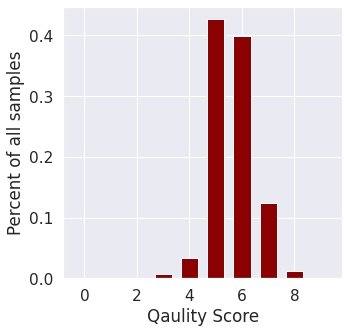

In [487]:
# Run Code
plot_histogram_quality(wine_red)

Notice that just over 40 percent of all wine samples have a quality rating of 5 and almost as many have the rating 6.  Imagine we just build an algorithm that takes a sample says the predicted quality rating is 5.5 without **ever** looking at the features?

In [488]:
## Write Code

def error_just_guessing(df, qv) :
  guess = np.full((1599,1),qv)
  print("Guessing a constant quality score:  \t{:4.2f}".format(qv))
  print("The root mean squared error is: \t{:4.2f}".format(mean_squared_error(ya, guess)))
  print("the mean absolute error is: \t\t{:4.2f}".format(mean_absolute_error(ya,guess)))
  
        

In [489]:
## Run Code

error_just_guessing(wine_red, 5.6)

Guessing a constant quality score:  	5.60
The root mean squared error is: 	0.65
the mean absolute error is: 		0.69


Note that so far we have learned that the average absolute error predicting the quality rating using linear regression on the single feature acohol is $0.56$ and this error increases to $0.69$ when just guessing that all wines have a score of $5.6$. 

The best we can say is we're doing just a small bit better with univariate regression on a single feature than we do using just a guess. 

## Part 4: Regression to Ratings

Another arguably better way to interpret the quality of the predictions is to map them into integer quality ratings which will - or will not - match those in the data set.  

In [490]:
## Write Code

def y_values_to_ratings (y) :
  for i in range(len(y)):
     y[i]= round(y[i]) 
  return y


In [491]:
## Run Code

accalr = np.sum(y_values_to_ratings(lra.predict(Xa)) == ya)/ya.shape[0]
print(f'Regression classification accurracy on alcohol: \t{accalr:5.2f}')

accagu = np.sum(5 == ya)/ya.shape[0]
print(f'Regression classification accurracy guessing 5: \t{accagu:5.2f}')

Regression classification accurracy on alcohol: 	 0.56
Regression classification accurracy guessing 5: 	 0.43


Note that it is possible to get $13$ out of $100$ wine qualities correct using the linear regression model on just alcholoh content when compared to simply guessing a quality rating of $5$.

However, it might be useful to look more carefully at the mistakes, and for that we want to generate a confusion matrix.  

As you develop the code to generate the confusion matrix here are some very specific hopefully helpful pointers.  

First, let us consider just the construction of the matrix.

In [492]:
## Write Code
from sklearn.metrics._plot.confusion_matrix import confusion_matrix as cm
# from sklearn.metrics import confusion_matrix
def make_cm_1(lra, Xa, y) :
  y_pred = lra.predict(Xa)
  # print(y_pred)
  for i in range(len(y_pred)):
     y_pred[i]= round(y_pred[i])
  # print(y)
  return cm(y, y_pred)


In [493]:
## Run Code
mat = make_cm_1(lra, Xa, ya)
print(mat)

[[  0   0   6   4   0   0]
 [  0   0  28  24   1   0]
 [  0   0 475 199   7   0]
 [  0   0 219 406  13   0]
 [  0   0  19 168  12   0]
 [  0   0   2  11   5   0]]


Second, the next fine point is building labels to use in the nicely displated plot of the confusion matrix. Keep in mind that your code should be general and find the integer range of quality rating scores present in ``y``.  To test your code notice the run code below will be tested using fake quality scores on a different interval.

In [494]:
## Write Code

def make_quality_text_labels(y) :
  labels = []
  for i in y:
    if i not in labels:
      labels.append(i)
  labels.sort()
  result = ["QR " + str(x) for x in labels]
  return result



In [495]:
## Run Code

print(make_quality_text_labels(ya))
print(make_quality_text_labels(np.random.randint(7,14,100)))

['QR 3', 'QR 4', 'QR 5', 'QR 6', 'QR 7', 'QR 8']
['QR 7', 'QR 8', 'QR 9', 'QR 10', 'QR 11', 'QR 12', 'QR 13']


Third, put steps one and two together with the actual code to plot the confusion matrix. 

Some hints about the plot. The figure size should be 7 by 6.  And [this stackoverflow post](https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn) might help with figure size. There is an argument to the plot command that will modify the display of the counts so they are printed as simple integers. Simply pass the empty string to ``values_format``.  The colormap you are looking at is ``plt.cm.YlGn``.

In [496]:
## Write Code

def display_confusion_matrix(lra, Xa, y, title) :
  # sns.set()
  mat = make_cm_1(lra, Xa, y)
  plt.figure(figsize=(7,6))
  sns.set(font_scale=1.4)
  res = sns.heatmap(mat,
              cmap = plt.cm.YlGn,
              xticklabels = make_quality_text_labels(ya),
              yticklabels = make_quality_text_labels(ya),
              annot = True,
              annot_kws={'size': 10},
              fmt = 'g',
              )
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title(title)
  plt.show()





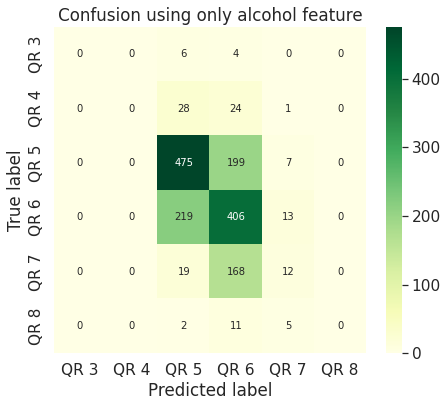

In [497]:
## Run Code

display_confusion_matrix(lra, Xa, ya, 'Confusion using only alcohol feature')

## Part 5: All Features one at a Time

So far we've just worked with the single feature ``alcohol`` - what about the others?

Below you will write the code to step through each feature and compute the classifcation accuracy based upon a univariate linear model relating that feature to ``quality``.

Some aspects of the code you are to write desere mention. First, your results will be printed in sorted order from least accurate 
ion to most accurate.  Second, keep in mind your code will step throught each feature and create a new linear model for each. The accuracy is then computed from that model in same basic way it was done above. Do not forget to convert floating point y value predictions to integer ratings - as done above.

In [498]:
## Write Code

def report_univariate_regression_models_accuracy(df) :
  vars = ['fixed acidity',
             'pH', 
             'residual sugar',
             'density',
             'free sulfur dioxide',
             'chlorides',
             'citric acid',
             'total sulfur dioxide',
             'volatile acidity',          
             'sulphates',
             'alcohol']
  Xall = df[vars].values
  y = df['quality'].values
  # print(Xall)
  for i in range(len(vars)):
    linreg = LinearRegression()
    linreg.fit(np.reshape(Xall[:,i], (-1,1)),y)
   # np.reshape(Xall[:,0], (-1,1))
    accalr = np.sum(y_values_to_ratings(linreg.predict(np.reshape(Xall[:,i], (-1,1)))) == y)/y.shape[0]
    print(f'Accuracy {accalr:5.2f} for feature {vars[i]}')



  # linreg = LinearRegression()
  # linreg.fit(np.reshape(Xall[:,0], (-1,1)),y)
  # # np.reshape(Xall[:,0], (-1,1))
  # accalr = np.sum(y_values_to_ratings(linreg.predict(np.reshape(Xall[:,0], (-1,1)))) == y)/y.shape[0]
  # print(f'Accuracy {accalr:5.2f} for feature fixed acidity')


In [499]:
## Run Code
report_univariate_regression_models_accuracy(wine_red)

Accuracy  0.39 for feature fixed acidity
Accuracy  0.40 for feature pH
Accuracy  0.40 for feature residual sugar
Accuracy  0.40 for feature density
Accuracy  0.40 for feature free sulfur dioxide
Accuracy  0.40 for feature chlorides
Accuracy  0.41 for feature citric acid
Accuracy  0.48 for feature total sulfur dioxide
Accuracy  0.48 for feature volatile acidity
Accuracy  0.49 for feature sulphates
Accuracy  0.56 for feature alcohol


Closing out this part, note that our first hunch based solely upon correlation between quality and features let us to consider ``alcohol`` and as it now turns out that feature is the best of the eleven in terms of prediction based upon a univariate linear model.

## Part 6: All Features Taken Together

How much better might our predictions get if we combine all eleven features into a single model?

In [500]:
## Write Code

def fit_multivariate_model (df) :
  vars = ['fixed acidity',
             'pH', 
             'residual sugar',
             'density',
             'free sulfur dioxide',
             'chlorides',
             'citric acid',
             'total sulfur dioxide',
             'volatile acidity',          
             'sulphates',
             'alcohol']
  Xall = df[vars].values
  y = df['quality'].values
  linreg = LinearRegression()
  linreg.fit(Xall,y)
  return Xall, y, linreg

   

In [501]:
## Run Code

X, y, lr = fit_multivariate_model(wine_red)

y_pred = np.round(lr.predict(X))
acc = np.sum(y_pred == y) / len(y)
print(f'The accuracy using all features: \t{acc:1.2f}')

The accuracy using all features: 	0.59


Let us revisit the confusion matrix, this time for the all eleven feature model. In fact, let us first redisplay the ``aclohol`` only confusion matrix and follow it with the all feature matrix so as to invite comparison.

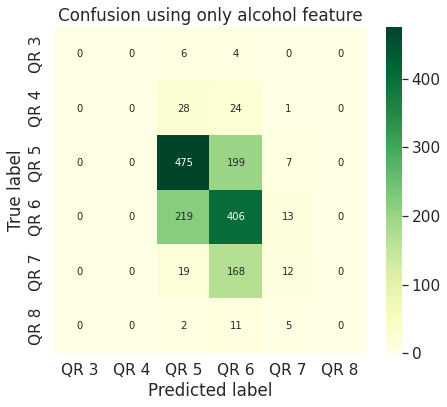

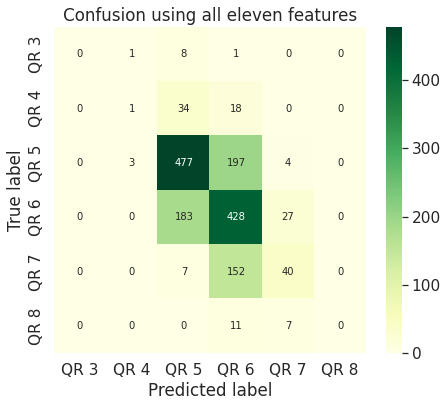

In [502]:
## Run Code

display_confusion_matrix(lra, Xa, ya, 'Confusion using only alcohol feature')
display_confusion_matrix(lr, X, y, 'Confusion using all eleven features')

## Part 7: What About Generalization

Up to now everything done is about describing the entire dataset.  

What about generalization?

Let us divide the red wine data samples into at training and test set and repeat the eleven feature regression where we respect the protocol that says fit the model on the training data and report performance on the test set.

In [503]:
## Write Code

def split_50_50(df) :
  vars = ['fixed acidity',
             'pH', 
             'residual sugar',
             'density',
             'free sulfur dioxide',
             'chlorides',
             'citric acid',
             'total sulfur dioxide',
             'volatile acidity',          
             'sulphates',
             'alcohol']
  Xall = df[vars].values
  y = df['quality'].values
  X_train, X_test, y_train, y_test = train_test_split(Xall, y, test_size=0.5)
  return X_train, X_test, y_train, y_test


When you run the next code it will test how well your 50 50 split keeps a balance of quality ratings in the training and test sets.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


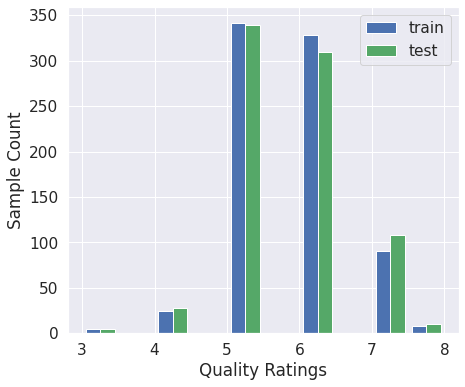

In [504]:
## Run Code

X_train, X_test, y_train, y_test = split_50_50(wine_red)

plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(7,6))
ax.hist([y_train, y_test], label=['train','test'])
ax.legend(loc='upper right')
ax.set_xlabel('Quality Ratings')
ax.set_ylabel('Sample Count')
pass

In [505]:
## Write Code

def fit_multivariate_model_50_50 (df) :
  X_train, X_test, y_train, y_test = split_50_50(df)
  linreg = LinearRegression()
  linreg.fit(X_train,y_train)
  y_pred = np.round(linreg.predict(X_test))
  acc = np.sum(y_pred == y_test) / len(y_pred)
  print(f'The first split accuracy is: \t{acc:1.2f}\n')

  linreg = LinearRegression()
  linreg.fit(X_test,y_test)
  y_pred = np.round(linreg.predict(X_train))
  acc = np.sum(y_pred == y_train) / len(y_pred)
  print(f'The second split accuracy is: \t{acc:1.2f}')
  


In [506]:
## Run Code

fit_multivariate_model_50_50(wine_red) 

The first split accuracy is: 	0.60

The second split accuracy is: 	0.58


## Part 8: Maybe Nearest Neighbor

In [507]:
## Write Code

def fit_nearest_neighbor_50_50 (df, k) :
  print(f'knn for a k of {k}')

  X_train, X_test, y_train, y_test = split_50_50(df)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred = np.round(knn.predict(X_test))
  acc = np.sum(y_pred == y_test) / len(y_pred)
  print(f'The first split accuracy is: \t{acc:1.3f}')

  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred = np.round(knn.predict(X_test))
  acc = np.sum(y_pred == y_test) / len(y_pred)
  print(f'The first split accuracy is: \t{acc:1.3f}\n')


In [508]:
## Run Code

fit_nearest_neighbor_50_50(wine_red, 1)
fit_nearest_neighbor_50_50(wine_red, 3)
fit_nearest_neighbor_50_50(wine_red, 5)
pass

knn for a k of 1
The first split accuracy is: 	0.535
The first split accuracy is: 	0.535

knn for a k of 3
The first split accuracy is: 	0.450
The first split accuracy is: 	0.450

knn for a k of 5
The first split accuracy is: 	0.482
The first split accuracy is: 	0.482



## Part 9: Is White Wine any Easier

There is another whole dataset just like the red wine dataset, but for white wines.

Note here you need to create the panda data frame called ``wine_white`` using the model of the code given above for red wine.

In [509]:
# Write Code
wine_white  = pd.read_table(r'winequality-white.csv', sep=';')
original  = [str for str in wine_white.columns]
reordered = [original[11]] + original[0:11]
wine_white  = wine_white.reindex(columns=reordered)
wine_white.head()


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [510]:
# Run Code

wine_white.corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,-0.113663,-0.194723,-0.009209,-0.097577,-0.209934,0.008158,-0.174737,-0.307123,0.099427,0.053678,0.435575
fixed acidity,-0.113663,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.194723,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,-0.009209,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,-0.097577,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,-0.209934,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,0.008158,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,-0.174737,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,-0.307123,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,0.099427,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432


Repeat the 50 50 split linear model analysis on the white wine quality data.

In [511]:
## Write Code
fit_multivariate_model_50_50(wine_white) 

The first split accuracy is: 	0.52

The second split accuracy is: 	0.51


Repeat the 50 50 split k nearest neighbor analysis on the white wine quality data.

In [512]:
## Write Code
fit_nearest_neighbor_50_50(wine_white, 1)
fit_nearest_neighbor_50_50(wine_white, 3)
fit_nearest_neighbor_50_50(wine_white, 5)

knn for a k of 1
The first split accuracy is: 	0.513
The first split accuracy is: 	0.513

knn for a k of 3
The first split accuracy is: 	0.440
The first split accuracy is: 	0.440

knn for a k of 5
The first split accuracy is: 	0.454
The first split accuracy is: 	0.454



## Part 10: Wrapup

Use the following markdown box to write a few sentences summarizing what you think you have learned - that is of importance - from using both regression and knn on the wine quality dataset. 

I think that there are three major things that I learned with this assignment.  
1. The type of model that is being used can have a pretty strong impact on the accuracy of generalization. In this particular case for my specific split the multivariate model was the most capable of generalizing. However it seems that this may be dependent on the data split as the answer that the assignment shows for white whine has equivilent accuracy for each split with white wine.
2. Looking at all variables in the data and using them in learning is important compared to just using the highest correlation value. 
We see that when we go from using just the alcohol content data which has the correlation to using all the variables we are able to increase the accuracy of the model by about 10%, showing that other data points can provide information that is important for the model to learn
3. it seems that splitting the dataset 50/50 does not affect the accuracy of the second split testing. This threw me for a bit of a loop since i figured that loosing the majority of test data would result in the second split having a bad accuracy, however this is not the case. In the first split we see an increase of accuracy, however, because of training on such a large dataset with a small test set this may due to overfitting rather than improving the accuracy of the model. However, regardless of the split we see that the accuracy is not as affected by the way we decide to split the data randomly into two partitions 